## LAB 3 tree-based classification 

### Adult-Income Dataset
[source] https://raw.githubusercontent.com/saravrajavelu/Adult-Income-Analysis/master/adult.csv :
Predict whether income exceeds $50K/yr based on census data

**Attribute information**
1.   age: continuous.
2.   workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.List item
3.  fnlwgt: continuous.
4.  education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5.  education-num: continuous.
6.  marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7.  occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**The outcome (Label)**
15. Income: >50K, <=50K

## อ่านชุดข้อมูล Adult Income

In [694]:
import pandas as pd
df = pd.read_csv("../Dataset/adult_income.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33958,37,Private,126675,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,57,United-States,<=50K
33959,46,Local-gov,175754,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,1876,60,United-States,<=50K
33960,31,Private,121768,Assoc-acdm,12,Divorced,Adm-clerical,Unmarried,White,Female,0,0,35,Poland,<=50K
33961,23,Private,180052,HS-grad,9,Never-married,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K


## ข้อ 1 จงวิเคราะห์ข้อมูลด้วย pandas เพื่อตอบคำถามข้อ 1.1 ถึง 1.6

In [695]:
# 1.1
samples = df['income'].value_counts()
samples

income
<=50K    25893
>50K      8069
Name: count, dtype: int64

In [696]:
# 1.2

categorical_features = df.select_dtypes(include=['object', 'category'])
categorical_features

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
33958,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
33959,Local-gov,Masters,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
33960,Private,Assoc-acdm,Divorced,Adm-clerical,Unmarried,White,Female,Poland,<=50K
33961,Private,HS-grad,Never-married,Other-service,Own-child,White,Male,United-States,<=50K


In [697]:
# 1.3

age = df['age'].mean()
print("อายุของพนักงานเฉลี่ย = ",age)

อายุของพนักงานเฉลี่ย =  38.655566351617935


In [698]:
# 1.4

selected_columns = df.loc[
    (df['gender'] == "Male") &
    (df['age'] > 40) &
    (df['marital-status'] == 'Never-married') &
    (df['income'] == '>50K'),
    ['age', 'marital-status', 'income']
]

print(selected_columns)

filtered_df = df[
    (df['gender'] == "Male") &
    (df['age'] > 40) &
    (df['marital-status'] == 'Never-married') &
    (df['income'] == '>50K')
]

count = len(filtered_df)
print("\nมีจำนวนพนักงาน = ", count)


       age marital-status income
584     44  Never-married   >50K
702     43  Never-married   >50K
1448    43  Never-married   >50K
2765    47  Never-married   >50K
2787    47  Never-married   >50K
...    ...            ...    ...
32685   51  Never-married   >50K
32719   59  Never-married   >50K
33145   42  Never-married   >50K
33335   60  Never-married   >50K
33844   71  Never-married   >50K

[114 rows x 3 columns]

มีจำนวนพนักงาน =  114


In [699]:
# 1.5

Work_Hours_Per_Week = df['hours-per-week'].max()
print("จำนวนชั่วโมงทำงานต่อสัปดาห์มากที่สุด = ",Work_Hours_Per_Week)

จำนวนชั่วโมงทำงานต่อสัปดาห์มากที่สุด =  99


In [700]:
# 1.6

ms_value_questionMarks = (df == '?').sum()

featues_question_Marks = ms_value_questionMarks[ms_value_questionMarks > 0]

print("Features ที่มี missing values เป็น '?' :")
print(featues_question_Marks)

Features ที่มี missing values เป็น '?' :
workclass         1951
occupation        1957
native-country     595
dtype: int64


## ข้อ 2. เขียนฟังก์ชั่นจัดการ missing values ในชุดข้อมูลนี้

In [701]:
# 2

import numpy as np

df_cleaned = df.replace('?', np.nan)
missing_before = df_cleaned.isnull().sum()
df_cleaned = df_cleaned.dropna()
missing_after = df_cleaned.isnull().sum()
print("ก่อนจัดการ Missing Values : \n", missing_before)

ก่อนจัดการ Missing Values : 
 age                   0
workclass          1951
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         1957
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      596
income                1
dtype: int64


In [702]:
# 2
print("หลังจัดการ Missing Values : \n", missing_after)

หลังจัดการ Missing Values : 
 age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [703]:
# 2
print(df_cleaned.shape)

(31444, 15)


## ข้อ 3. แปลง categorical features ให้อยู่ในรูปของ binary features 

In [704]:
# 3
from sklearn.preprocessing import OneHotEncoder

categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('income')

encoder = OneHotEncoder(drop='first')
encoded_array = encoder.fit_transform(df_cleaned[categorical_cols]).toarray()

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols), index=df_cleaned.index)

df_numeric = df_cleaned.drop(columns=categorical_cols)
df_final = pd.concat([df_numeric, encoded_df], axis=1)

print("binary features : ", (df_final.shape))

binary features :  (31444, 96)


## ข้อ 4. แบ่งชุดข้อมูลดังกล่าวออกเป็น  80% และ 20% สำหรับฝึก (train) และทดสอบ (test) 

In [705]:
from sklearn.model_selection import train_test_split

X = df_final.drop(columns=['income'])
y = df_final['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("จำนวน Train : ",len(X_train))
print("จำนวน Test : ",len(X_test))

จำนวน Train :  25155
จำนวน Test :  6289


## 5. สร้างโมเดล Decision tree โดยใช้ชุดข้อมูล train กำหนดให้ใช้ entropy เป็น split criterion และความลึกสูงสุดของต้นไม้ไม่เกิน 2 ระดับ (level) 

In [706]:
from sklearn.tree import DecisionTreeClassifier, export_text


clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
clf.fit(X_train, y_train)
feature_names = X_train.columns
used_features = set(feature_names[i] for i in clf.tree_.feature if i != -2)
most_important_feature = feature_names[clf.tree_.feature[0]]
tree_rules = export_text(clf, feature_names=list(feature_names))
print("\nFeatures ที่ใช้ในการทำ Decision Trees: \n", used_features)
print("\nFeatures ที่สำคัญ: \n", most_important_feature)
print("\nแปลงเป็น if-else แล้ว: \n", tree_rules)


Features ที่ใช้ในการทำ Decision Trees: 
 {'capital-gain', 'educational-num', 'marital-status_Married-civ-spouse'}

Features ที่สำคัญ: 
 marital-status_Married-civ-spouse

แปลงเป็น if-else แล้ว: 
 |--- marital-status_Married-civ-spouse <= 0.50
|   |--- capital-gain <= 7055.50
|   |   |--- class: <=50K
|   |--- capital-gain >  7055.50
|   |   |--- class: >50K
|--- marital-status_Married-civ-spouse >  0.50
|   |--- educational-num <= 11.50
|   |   |--- class: <=50K
|   |--- educational-num >  11.50
|   |   |--- class: >50K



## ข้อ 6. ความแม่นยำ (accuracy) ของโมเดล decision tree บนชุดข้อมูลทดสอบ 

In [707]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"ความแม่นยำ (accuracy) ของโมเดล decision tree: {accuracy*100:.2f}%")

ความแม่นยำ (accuracy) ของโมเดล decision tree: 82.64%


### ข้อ 7. สร้างโมเดล random forest โดยกำหนดความลึกสูงสุดของต้นไม้เท่ากับ 3 ขณะที่จำนวนต้นไม้ย่อย (n_estimator) ใช้ GridSearchCV ค้นหาค่าที่ดีที่สุดบนชุดข้อมูล train กำหนดช่วงค่าอยู่ระหว่าง 6 ถึง 10

In [708]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_depth=3, random_state=42)
param_grid = {'n_estimators': list(range(6, 11))}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_n_estimators = grid_search.best_params_['n_estimators']
print("ค่าที่ดีที่สุด: ", best_n_estimators)


ค่าที่ดีที่สุด:  6


### 8.	แสดงต้นไม้ random forest ที่สร้างได้ 6 ต้นแรก   

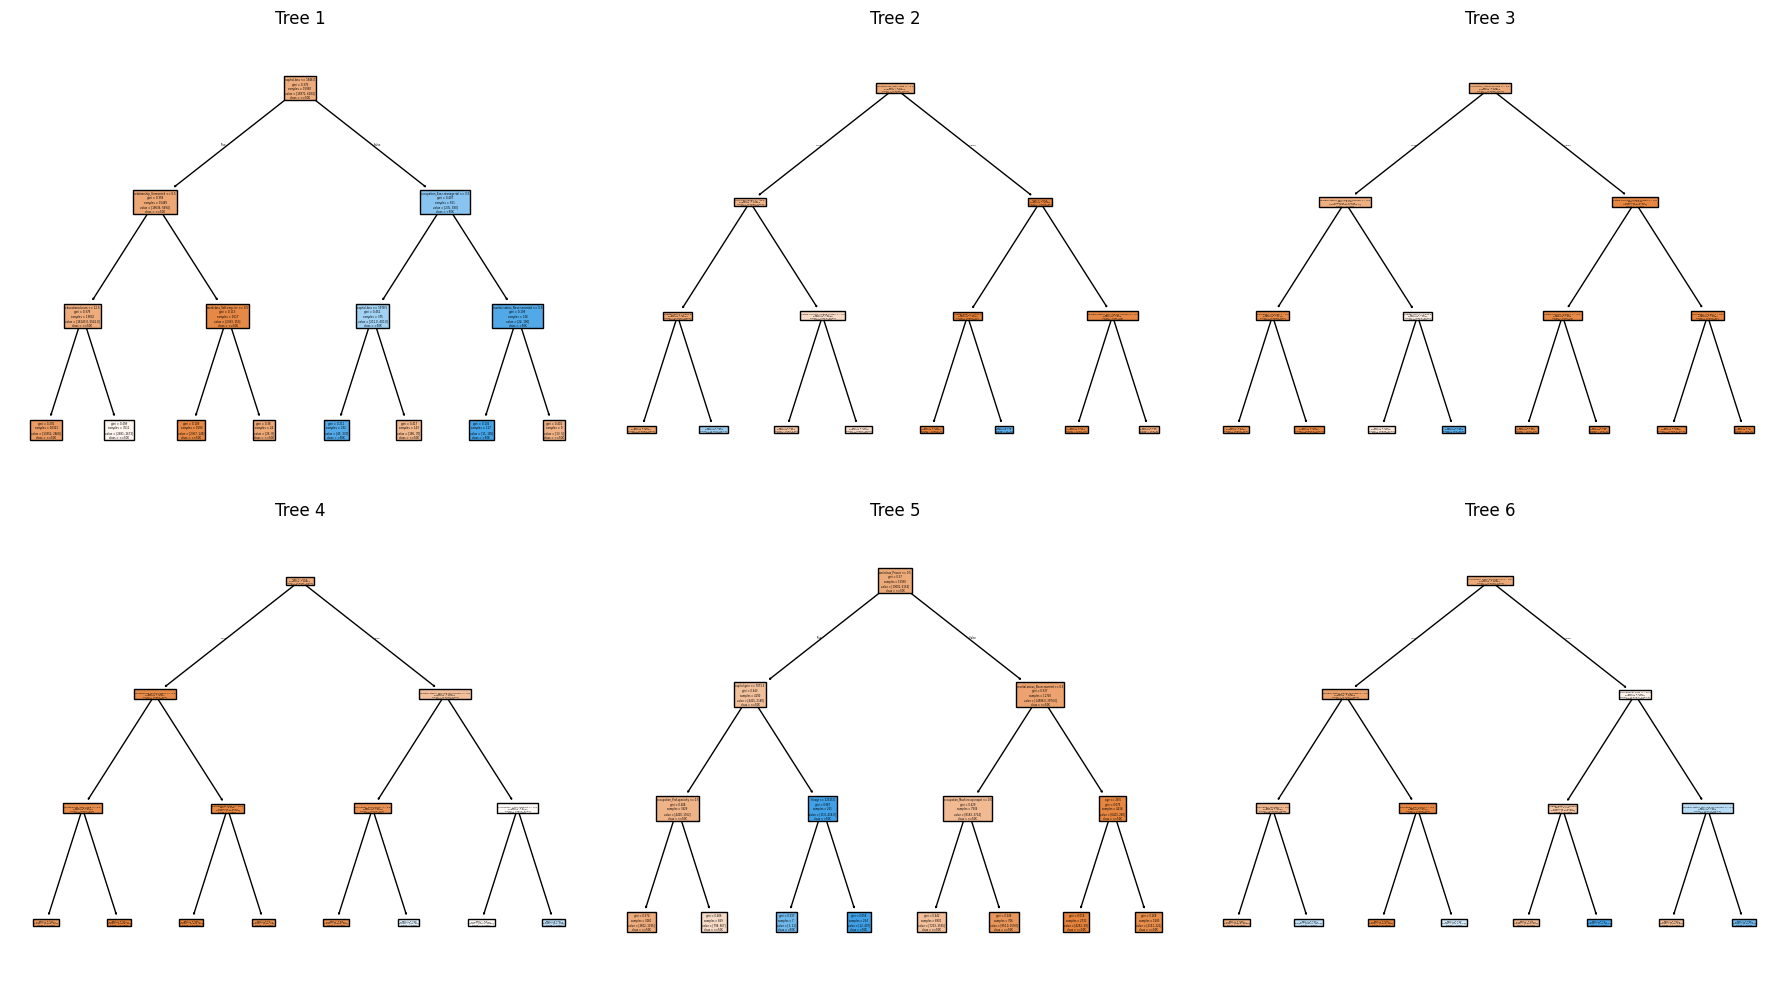

In [709]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

best_rf = RandomForestClassifier(n_estimators=6, max_depth=3, random_state=42)
best_rf.fit(X_train, y_train)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
for i, tree in enumerate(best_rf.estimators_[:6]):
    plot_tree(tree,
              feature_names=X_train.columns,
              class_names=best_rf.classes_,
              filled=True,
              max_depth=3,
              ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Tree {i+1}")

plt.tight_layout()
plt.show()

## 9.	ความแม่นยำ (accuracy) ของโมเดล random forest บนชุดข้อมูลทดสอบ 

In [710]:
y_pred_rf = best_rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"ความแม่นยำ (accuracy) ของโมเดล random forest: {rf_accuracy*100:.2f}%")

ความแม่นยำ (accuracy) ของโมเดล random forest: 78.30%


## ข้อ 10. ปรับปรุงโมเดล random forest จากข้อ 7 โดยใช้อัลกอริทึม XgBoost พร้อมแสดงค่าความแม่นยำบนชุดข้อมูลทดสอบ (test data) 

## ข้อ 11. ทดลองใช้ GridSearchCV เพื่อหาจำนวนต้นไม้ย่อยใน XgBoost ที่ให้ผลลัพธ์สูงที่สุด จากการกำหนดค่าความลึกตั้งแต่ 2 ถึง 4 ระดับ และจำนวนต้นไม้ย่อยตั้งแต่  1 ถึง 20 ต้น 

## ข้อ 12.	บันทึกโมเดล XGboost ในรูปแบบของไฟล์ pickle ตั้งชื่อ XgB.pkl.